In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib import histos2d as h2
%matplotlib inline

# Hypothesis testing

we have data from one experiment (**experiment A**) with 1000 events. We simulate the experiment but we actually do not know the $\mu$ that generated the data.

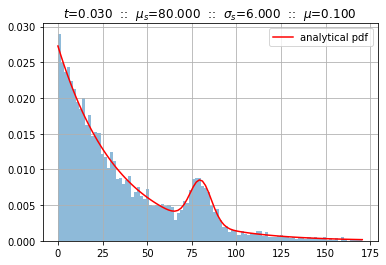

In [61]:
alpha=0.05
t, mu_s, sigma_s, real_mu = 0.03, 80, 6, 0.1
n_events = 10000 # number of events per experiment

n_experiments = 4000 # number of experiments (each one with n_events) for empirical distributions

m_c0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
x = m_c0.rvs(n_events)
m_c0.plot_sample(x, bins=100)

## We now want to test a certain value for $\mu$

we use the negative likelihood as test-statistic $t_s$

observe this is a **one sided** statistic

In [86]:
test_mu = .3
m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])

obtain a distribution of the $t_s$ given this value of $\mu$, and compute the $p_{value}$ of our data according to this $\mu$

In [87]:
m_c1.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)
x_pval = m_c1.get_pvalue(x)
x_pval

0.02175

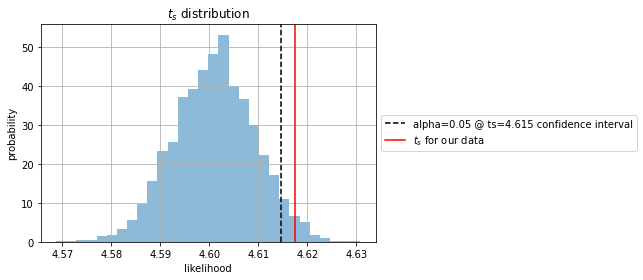

In [88]:
m_c1.plot_ts_distribution(ts_val=m_c1.neg_likelihood(x))

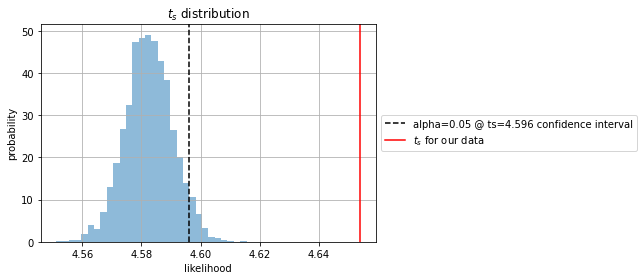

In [89]:
test_mu = .4
m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
m_c1.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)
x_pval = m_c1.get_pvalue(x)
m_c1.plot_ts_distribution(ts_val=m_c1.neg_likelihood(x))

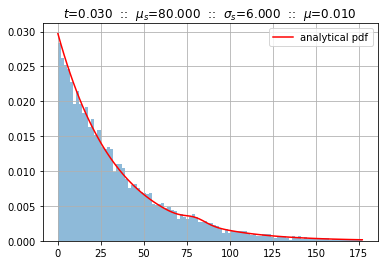

In [111]:
real_mu = 0.01
m_c0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
x = m_c0.rvs(n_events)
m_c0.plot_sample(x, bins=100)

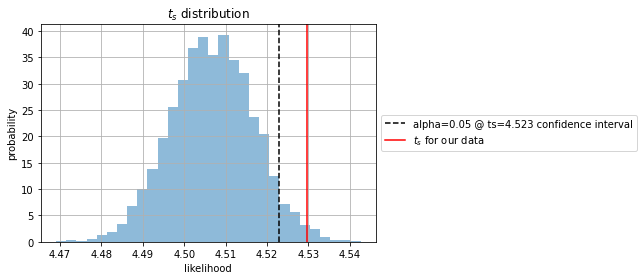

In [112]:
test_mu = 0
m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
m_c1.build_ts_distribution(n_events=n_events, n_experiments=4000, show_pbar=False)
x_pval = m_c1.get_pvalue(x)
m_c1.plot_ts_distribution(ts_val=m_c1.neg_likelihood(x))

## obtain the $p_{value}$ for our data given different $\mu$

In [80]:
mus = np.linspace(0,real_mu*1.5,20)
pvals = []
n_experiments = 500
for test_mu in pbar(mus):
    m = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, test_mu])
    m.build_ts_distribution(n_events=n_events, n_experiments=n_experiments, show_pbar=False)
    pv = m.get_pvalue(x)
    pvals.append(pv)
pvals = np.r_[pvals]

100% (20 of 20) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


min $\mu$ compatible with the experiment data $\rightarrow$ smaller $\mu$ will cause the test to reject the hypothesis that a model with that smaller $\mu$ generated the data.

In [81]:
min_mu = mus[np.argwhere(pvals>0.05)[0][0]]
min_mu

0.055263157894736854

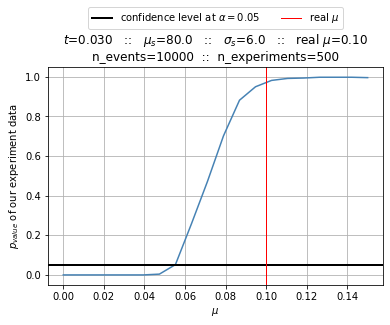

In [82]:
plt.plot(mus, pvals, color="steelblue")
plt.grid();
plt.xlabel("$\mu$")
plt.ylabel("$p_{value}$ of our experiment data");
plt.axhline(0.05, color="black", lw=2, label="confidence level at $\\alpha=0.05$")
#plt.axvline(min_mu, color="red", lw=2, ls="--",  label="min $\mu$ compatible with the data = %.2f"%min_mu)
#plt.axhline(0.5, color="black", ls="--", alpha=.5, label="max agreement in two-sided test")
plt.axvline(real_mu, color="red", lw=1, label="real $\mu$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.title("$t$=%.3f   ::   $\mu_s$=%.1f   ::   $\sigma_s$=%.1f   ::   real $\mu$=%.2f\nn_events=%d  ::  n_experiments=%d"%(t, mu_s, sigma_s, real_mu, n_events, n_experiments));

see summary at https://drive.google.com/drive/u/0/folders/1AKMpnNYaX14AUf-oX50o3sUHhVU5y-Cq